In [1]:
import pandas as pd

In [2]:
import ipympl

In [3]:
import scipy as sp
import numpy as np

In [4]:
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [5]:
import datetime

In [6]:
import matplotlib.pyplot as plt

In [7]:
get_distributions()

['_fit',
 'alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gibrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw

In [8]:
dataset_df = pd.read_csv("Inputs\dataset.csv")

In [9]:
%matplotlib widget

In [10]:
dataset_df["ID3_DA_premium"] = dataset_df["ID3"]-dataset_df["DA price"]
dataset_df["timestamp"]=dataset_df["timestamp"].apply(lambda t: datetime.datetime.strptime(t[:-6], "%Y-%m-%d %H:%M:%S"))

In [11]:
dataset_df.head()

timestamp        ID3  DA price  total RES Generation (MWh)  \
0 2021-01-01 00:00:00        NaN     48.19                      1075.0   
1 2021-01-01 01:00:00  47.084662     44.68                      1086.0   
2 2021-01-01 02:00:00  47.205347     42.92                      1149.0   
3 2021-01-01 03:00:00  41.601700     40.39                      1170.0   
4 2021-01-01 04:00:00  38.277904     40.20                      1190.0   

   total RES DA Forecast (MWh)  total RES DA Forecast error (MWh)  \
0                       1166.0                              -91.0   
1                       1128.0                              -42.0   
2                       1092.0                               57.0   
3                       1058.0                              112.0   
4                       1066.0                              124.0   

   Solar Generation (MWh)  Solar Gen Dayahead Forecast (MWh)  \
0                     0.0                                0.0   
1                     0.0                                0.0   
2                     0.0                                0.0   
3                     0.0                                0.0   
4                     0.0                                0.0   

   Solar DA forecast error (MWh)  Wind Generation (MWh)  \
0                            0.0                 1075.0   
1                            0.0                 1086.0   
2                            0.0                 1149.0   
3                            0.0                 1170.0   
4                            0.0                 1190.0   

   Wind Gen Dayahead Forecast (MWh)  Wind DA forecast error (MWh)  \
0                            1166.0                         -91.0   
1                            1128.0                         -42.0   
2                            1092.0                          57.0   
3                            1058.0                         112.0   
4                            1066.0                         124.0   

   Wind Installed Capacity  Solar Installed Capacity  RES Installed Capacity  \
0                    17217                     10213                   27430   
1                    17217                     10213                   27430   
2                    17217                     10213                   27430   
3                    17217                     10213                   27430   
4                    17217                     10213                   27430   

   Total Demand (MWh)  Nuclear Generation (MWh)  ID3_DA_premium  
0             64139.0                   49465.0             NaN  
1             62657.0                   48294.0        2.404662  
2             59481.0                   48380.0        4.285347  
3             57656.0                   48560.0        1.211700  
4             57640.0                   48534.0       -1.922096

In [12]:
print(len(dataset_df[dataset_df.isnull().any(axis=1)])/len(dataset_df)) #less than 1% of inclomplete data, just remove it for now
df = dataset_df.dropna().copy().reset_index()
print((len(dataset_df)-len(df))/len(dataset_df)) # double check dropna worked 

0.010983910891089108
0.010983910891089108


In [13]:
df.head()

index           timestamp        ID3  DA price  total RES Generation (MWh)  \
0      1 2021-01-01 01:00:00  47.084662     44.68                      1086.0   
1      2 2021-01-01 02:00:00  47.205347     42.92                      1149.0   
2      3 2021-01-01 03:00:00  41.601700     40.39                      1170.0   
3      4 2021-01-01 04:00:00  38.277904     40.20                      1190.0   
4      5 2021-01-01 05:00:00  39.982280     39.63                      1261.0   

   total RES DA Forecast (MWh)  total RES DA Forecast error (MWh)  \
0                       1128.0                              -42.0   
1                       1092.0                               57.0   
2                       1058.0                              112.0   
3                       1066.0                              124.0   
4                       1075.0                              186.0   

   Solar Generation (MWh)  Solar Gen Dayahead Forecast (MWh)  \
0                     0.0                                0.0   
1                     0.0                                0.0   
2                     0.0                                0.0   
3                     0.0                                0.0   
4                     0.0                                0.0   

   Solar DA forecast error (MWh)  Wind Generation (MWh)  \
0                            0.0                 1086.0   
1                            0.0                 1149.0   
2                            0.0                 1170.0   
3                            0.0                 1190.0   
4                            0.0                 1261.0   

   Wind Gen Dayahead Forecast (MWh)  Wind DA forecast error (MWh)  \
0                            1128.0                         -42.0   
1                            1092.0                          57.0   
2                            1058.0                         112.0   
3                            1066.0                         124.0   
4                            1075.0                         186.0   

   Wind Installed Capacity  Solar Installed Capacity  RES Installed Capacity  \
0                    17217                     10213                   27430   
1                    17217                     10213                   27430   
2                    17217                     10213                   27430   
3                    17217                     10213                   27430   
4                    17217                     10213                   27430   

   Total Demand (MWh)  Nuclear Generation (MWh)  ID3_DA_premium  
0             62657.0                   48294.0        2.404662  
1             59481.0                   48380.0        4.285347  
2             57656.0                   48560.0        1.211700  
3             57640.0                   48534.0       -1.922096  
4             58365.0                   48558.0        0.352280

In [14]:
df["RES LF"] = df["total RES Generation (MWh)"] / df["RES Installed Capacity"]
df["Solar LF"] = df["Solar Generation (MWh)"] / df["Solar Installed Capacity"]
df["Wind LF"] = df["Wind Generation (MWh)"] / df["Wind Installed Capacity"]
df["total RES LF Forecast Abs error"]=(df["total RES DA Forecast error (MWh)"]/df["RES Installed Capacity"]).apply(abs)
df["Solar LF Forecast Abs error"]=(df["Solar DA forecast error (MWh)"]/df["Solar Installed Capacity"]).apply(abs)
df["Wind LF Forecast Abs error"]=(df["Wind DA forecast error (MWh)"]/df["Wind Installed Capacity"]).apply(abs)
df["Residual Demand"] = df["Total Demand (MWh)"]-df["total RES Generation (MWh)"]
df["Residual Demand No Nuclear"] = df["Residual Demand"] - df["Nuclear Generation (MWh)"]

Text(0.5, 1.0, 'Overall ID3-DA premium distribution')

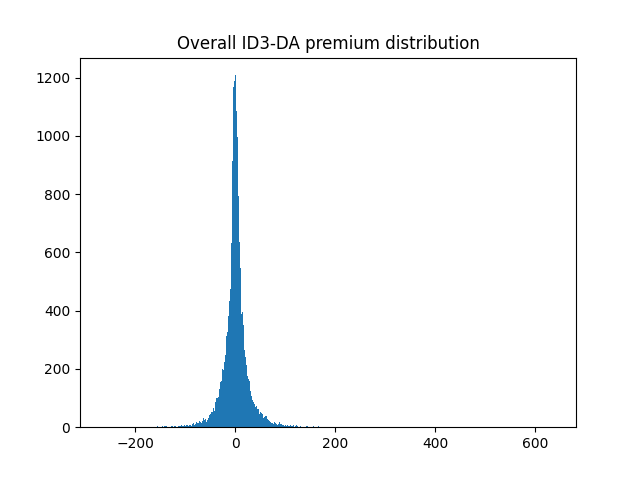

In [19]:
fig, ax = plt.subplots()
ax.hist(df["ID3_DA_premium"], bins=500)
ax.set_title('Overall ID3-DA premium distribution')

In [18]:
f = Fitter(df["ID3_DA_premium"].values,
           distributions=["norm",
                          "laplace"])
f.fit()
f.summary()

sumsquare_error           aic           bic  kl_div  ks_statistic  \
laplace         0.000034   3756.723137   3772.446279     inf      0.047054   
norm            0.000549  11321.306488  11337.029631     inf      0.146954   

            ks_pvalue  
laplace  2.433898e-37  
norm     0.000000e+00

In [18]:
f.get_best()

{'laplace': {'loc': -0.16113510000002407, 'scale': 17.32976270971959}}

In [19]:
df["DA price"].describe()

count    19179.000000
mean       187.425637
std        137.503937
min        -66.180000
25%         79.005000
50%        161.210000
75%        248.890000
max       1021.730000
Name: DA price, dtype: float64

In [21]:
mu_0 = df["ID3_DA_premium"].median()
nu_0 = np.mean(abs(df["ID3_DA_premium"].values - mu_0))
print(mu_0,nu_0)

bucket_price_1=(-df["DA price"].min(), 78)
premia_buck_1 = df.loc[(df["DA price"]>=bucket_price_1[0]) & (df["DA price"]<=bucket_price_1[1]), "ID3_DA_premium"]
mu_1 = premia_buck_1.median()
nu_1 = np.mean(abs(premia_buck_1.values - mu_1))
print(mu_1,nu_1)

bucket_price_2=(78, 160)
premia_buck_2 = df.loc[(df["DA price"]>=bucket_price_2[0]) & (df["DA price"]<=bucket_price_2[1]), "ID3_DA_premium"]
mu_2 = premia_buck_2.median()
nu_2 = np.mean(abs(premia_buck_2.values - mu_2))
print(mu_2,nu_2)

bucket_price_3=(160, 240)
premia_buck_3 = df.loc[(df["DA price"]>=bucket_price_3[0]) & (df["DA price"]<=bucket_price_3[1]), "ID3_DA_premium"]
mu_3 = premia_buck_3.median()
nu_3 = np.mean(abs(premia_buck_3.values - mu_3))
print(mu_3,nu_3)


-0.16113510000002407 17.32976270971959
0.3435711199999929 7.1380757555310534
-0.20527323000000308 12.090003191116178
-0.00888189999999156 16.06021219107143


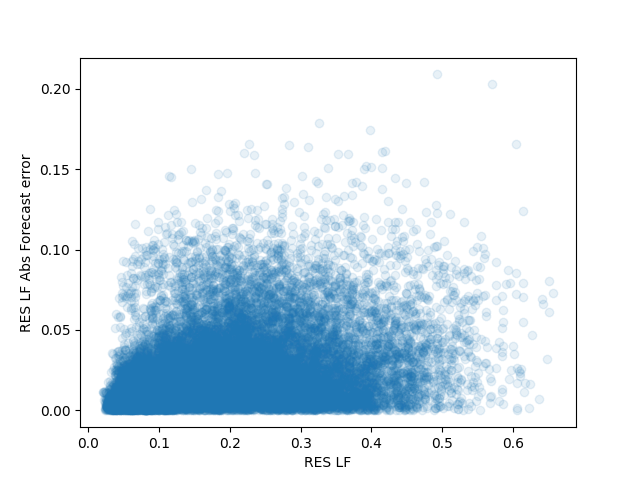

In [22]:
fig, axs = plt.subplots()
axs.scatter(df["RES LF"], df["total RES LF Forecast Abs error"], alpha=0.1)
axs.set_xlabel("RES LF")
axs.set_ylabel("RES LF Abs Forecast error")
plt.show()

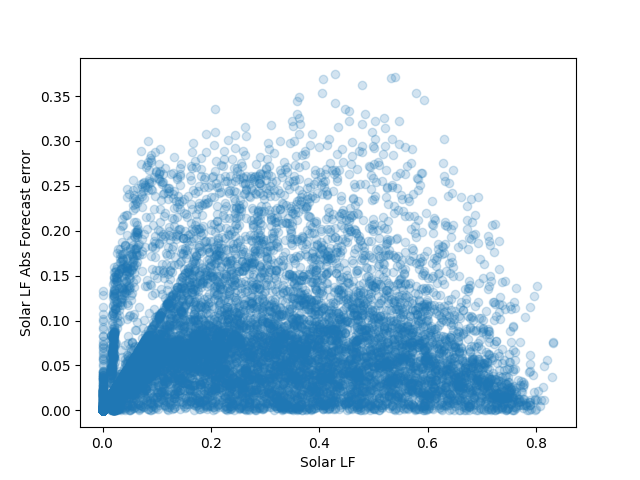

In [23]:
fig, axs = plt.subplots()
axs.scatter(df["Solar LF"], df["Solar LF Forecast Abs error"], alpha=0.2)
axs.set_xlabel("Solar LF")
axs.set_ylabel("Solar LF Abs Forecast error")
plt.show()

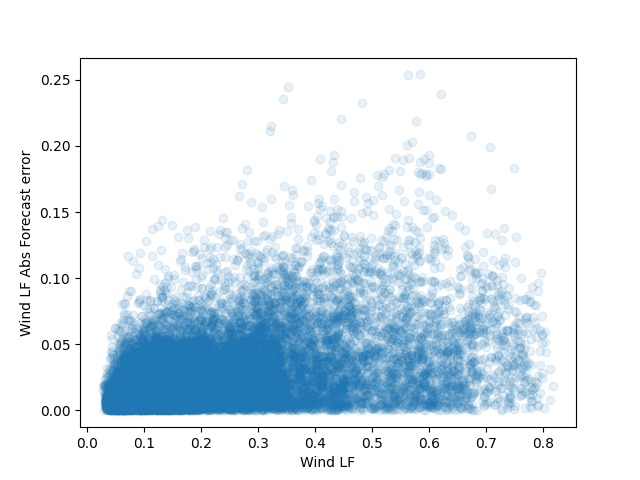

In [24]:
fig, axs = plt.subplots()
axs.scatter(df["Wind LF"], df["Wind LF Forecast Abs error"], alpha=0.1)
axs.set_xlabel("Wind LF")
axs.set_ylabel("Wind LF Abs Forecast error")
plt.show()

In [28]:
import random
print(random.sample(range(5), 5))

[2, 0, 3, 4, 1]
